In [1]:
import sys
sys.path.append('../')
# from experiments import utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly_express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plot.utils import bar_update_fig, line_update_fig
import pypolo2

width = 1000
height = 800
markersize = 10
linewidth = 4
# markersymbol={'FH':4, 'HEUR':17, 'DDRL':2}
linetype = {'Low':'dot','Medium':'dashdot','High':'longdash'}
# 创建一个包含线型的示例数组
line_dash = ['solid', 'dot', 'dash', 'dashdot', 'longdash']
# colors_dict = ['#C74223', '#3D9182', '#245C8F']
# colors_dict = ['#2ca02c', '#d62728', '#1f77b4']
markersymbol={'FH':2, 'HEUR':'star', 'DDRL':5}
colors_dict = ['#d62728', '#ff7f0e', '#1f77b4']

测试画图，画出污染随时间的变化以及波动范围

In [2]:
# 区域pm2.5平均浓度变化
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
strategy_pm = []
sche_step = 0
adaptive_step = 0
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_pm = []
    for i in range(5):
        comparing_variable = comparing_variables[0][i]
        team_size = team_sizes[i]
        sourcenum = 3
        seed_pm = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            pm = data['truth_env']
            # 获取特定时间点的效果数据
            time_pm = []
            for time_point in range(48):
                time_pm.append(np.mean(pm[time_point]))
            seed_pm.append(time_pm)
        variable_pm.append(seed_pm)
    strategy_pm.append(variable_pm)
strategy_pm = np.array(strategy_pm)
print(strategy_pm.shape)

(3, 5, 12, 48)


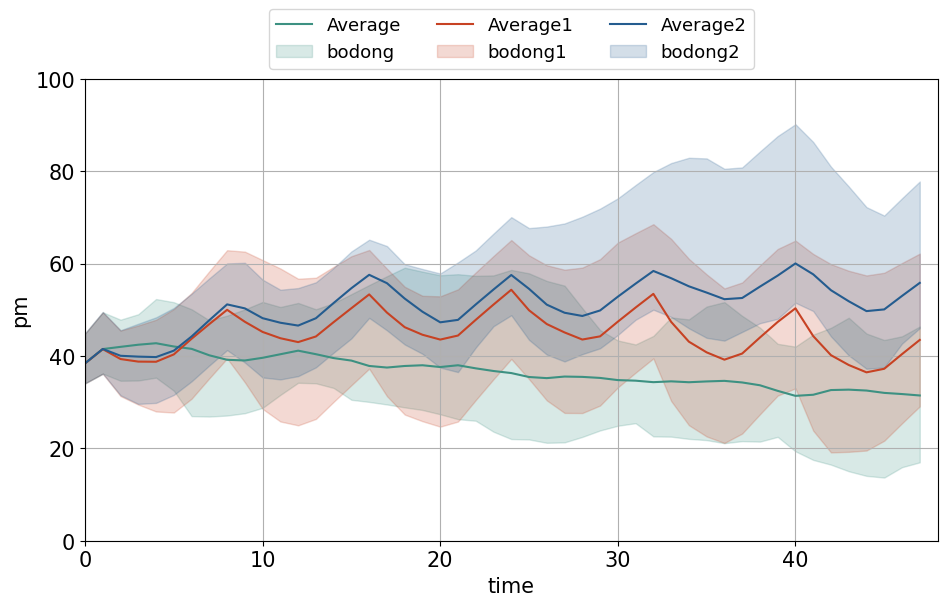

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# colors_dict = ['#3D9182','#C74223','#245C8F', '#FF8C00']
colors_dict = ['#2ca02c', '#d62728', '#1f77b4']

# 设置绘图大小
plt.figure(figsize=(11, 6))  # 宽度为 10.5，高度为 6.5
data = strategy_pm[0,2]  # 这里使用随机数据代替您的实际数据
mean_values = np.mean(data, axis=0)
upper_limit = np.max(data, axis=0)
lower_limit = np.min(data, axis=0)
x = np.arange(48)  # x轴数据点
plt.plot(x, mean_values, color = colors_dict[0], label="Average")  # 绘制平均值线
plt.fill_between(x, lower_limit, upper_limit, color = colors_dict[0], alpha=0.2, label='bodong')  # 绘制上下限区域

data = strategy_pm[1,2]  # 这里使用随机数据代替您的实际数据
mean_values = np.mean(data, axis=0)
upper_limit = np.max(data, axis=0)
lower_limit = np.min(data, axis=0)
x = np.arange(48)  # x轴数据点
plt.plot(x, mean_values, color = colors_dict[1], label="Average1")  # 绘制平均值线
plt.fill_between(x, lower_limit, upper_limit, color = colors_dict[1], alpha=0.2, label='bodong1')  # 绘制上下限区域

data = strategy_pm[2,2]  # 这里使用随机数据代替您的实际数据
mean_values = np.mean(data, axis=0)
upper_limit = np.max(data, axis=0)
lower_limit = np.min(data, axis=0)
x = np.arange(48)  # x轴数据点
plt.plot(x, mean_values, color = colors_dict[2], label="Average2")  # 绘制平均值线
plt.fill_between(x, lower_limit, upper_limit, color = colors_dict[2], alpha=0.2, label='bodong2')  # 绘制上下限区域


plt.xlabel('time', fontsize=15)
plt.ylabel('pm', fontsize=15)
# plt.title('average pm', fontsize=18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.17), ncol=3, fontsize=13)

# 设置坐标轴范围
plt.xlim(0, 48)  # 设置x轴范围为0到48
plt.ylim(0, 100)  # 设置y轴范围为0到100

# 设置横纵坐标刻度标签的字体大小
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# 添加网格线
plt.grid(True)

plt.show()

# Average pm2.5 concentration at different time point

In [8]:
# 区域pm2.5平均浓度变化
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray",
                 "NoSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"],
                       ["numsource_1","numsource_2","numsource_3","numsource_4","numsource_5"],
                       ["change_interval4","change_interval8","change_interval12"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
sourcenums = [1,2,3,4,5]
change_intervals = [4,8,12]
strategy_meanpm = []
sche_step = 0
adaptive_step = 0
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_meanpm = []
    for i in range(5):
        comparing_variable = comparing_variables[0][i]
        team_size = team_sizes[i]
        sourcenum = 3
        time_meanpm = []
        for time_point in range(48):
            seed_meanpm = []
            for seed in seeds:
                pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
                pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
                data = pypolo2.experiments.utilities.readpkl(pkldir)
                pm = data['truth_env']
                # 获取特定时间点的效果数据
                seed_meanpm.append(np.mean(pm[time_point]))
            time_meanpm.append(np.mean(seed_meanpm))
        variable_meanpm.append(time_meanpm)
    strategy_meanpm.append(variable_meanpm)
strategy_meanpm = np.array(strategy_meanpm)

In [9]:
width = 1050
height = 550
linewidth = 4
markersymbol={'FH':4, 'HEUR':17, 'DDRL':2}
markersize = 1
linetype = {'Low':'dot','Medium':'dashdot','High':'solid'}
# colors_dict = ['#3D9182','#C74223','#245C8F', '#FF8C00']
# colors_dict = ['#2ca02c', '#d62728', '#1f77b4']
colors_dict = ['#d62728', '#ff7f0e', '#1f77b4']
labels = []
Time_deadline = 48
for i in range(Time_deadline):
    labels.append(int(i*10))

xtitle = 'Time(min)'
ytitle = 'Average PM2.5 Concentration (μg/m³)'

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_meanpm[0][2][0:Time_deadline], 
    name='SmartSpr', 
    mode='lines', 
    line=dict(color=colors_dict[0],dash=linetype['High'], width=linewidth),))
fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_meanpm[1][2][0:Time_deadline], 
    name='MCPP', 
    mode='lines', 
    line=dict(color=colors_dict[1],dash=linetype['Medium'], width=linewidth),))
fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_meanpm[2][2][0:Time_deadline], 
    name='MaximumCoverage', 
    mode='lines', 
    line=dict(color=colors_dict[2],dash=linetype['Low'], width=linewidth),))

fig = line_update_fig(fig, xtitle, ytitle, width=width, height=height)
fig.update_xaxes(title_text=xtitle, title_font=dict(size=30),tickfont=dict(size=25))
fig.update_yaxes(title_text=ytitle, title_font=dict(size=30),tickfont=dict(size=25))
fig.update_layout(
    yaxis=dict(range=[0, 80]),
    legend=dict(font=dict(size=25), x=0.5, y=1.15)) # name size
fig.show()
filename = './outputs/png/line_timeAveragePollution-teamsize3-linetype.png'
print(filename)
# fig.write_image(filename, scale=1)

./outputs/png/line_timeAveragePollution-teamsize3-linetype.png


# pm2.5 concentration at different time point

In [4]:
# 区域pm2.5平均浓度变化
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray",
                 "NoSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"],
                       ["numsource_1","numsource_2","numsource_3","numsource_4","numsource_5"],
                       ["change_interval4","change_interval8","change_interval12"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
sourcenums = [1,2,3,4,5]
change_intervals = [4,8,12]
strategy_meanpm = []
sche_step = 0
adaptive_step = 0
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_meanpm = []
    for i in range(5):
        comparing_variable = comparing_variables[0][i]
        team_size = team_sizes[i]
        sourcenum = 3
        seed_meanpm = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            pm = data['truth_env']
            time_meanpm = []
            for time_point in range(48): 
                # 获取特定时间点的效果数据
                time_meanpm.append(np.mean(pm[time_point]))
            seed_meanpm.append(time_meanpm)
        variable_meanpm.append(seed_meanpm)
    strategy_meanpm.append(variable_meanpm)
strategy_meanpm = np.array(strategy_meanpm)
print(strategy_meanpm.shape)

(4, 5, 12, 48)


In [6]:
width = 1050
height = 550
linewidth = 3
markersymbol={'FH':4, 'HEUR':17, 'DDRL':2}
markersize = 1
linetype = {'Low':'dot','Medium':'dashdot','High':'solid'}
# colors_dict = ['#3D9182','#C74223','#245C8F', '#FF8C00']
# colors_dict = ['#2ca02c', '#d62728', '#1f77b4']
colors_dict = ['#d62728', '#ff7f0e', '#1f77b4']
labels = []
Time_deadline = 48
for i in range(Time_deadline):
    labels.append(int(i*10))

xtitle = 'Time(min)'
ytitle = 'Average PM2.5 Concentration (μg/m³)'

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_meanpm[0][2][7][0:Time_deadline], 
    name='SmartSpr', 
    mode='lines', 
    line=dict(color=colors_dict[0],dash=linetype['High'], width=linewidth),))
fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_meanpm[1][2][7][0:Time_deadline], 
    name='MCPP', 
    mode='lines', 
    line=dict(color=colors_dict[1],dash=linetype['Medium'], width=linewidth),))
fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_meanpm[2][2][7][0:Time_deadline], 
    name='MaximumCoverage', 
    mode='lines', 
    line=dict(color=colors_dict[2],dash=linetype['Low'], width=linewidth),))

fig = line_update_fig(fig, xtitle, ytitle, width=width, height=height)
fig.update_xaxes(title_text=xtitle, title_font=dict(size=30),tickfont=dict(size=25))
fig.update_yaxes(title_text=ytitle, title_font=dict(size=30),tickfont=dict(size=25))
fig.update_layout(
    yaxis=dict(range=[0, 80]),
    legend=dict(font=dict(size=25), x=0.5, y=1.15)) # name size
fig.show()
filename = './outputs/png/line_timeAveragePollution-teamsize3-linetype.png'
print(filename)
fig.write_image(filename, scale=1)

./outputs/png/line_timeAveragePollution-teamsize3-linetype.png


# cumulate pm2.5 concentration suppression at different time point

In [59]:
# 区域pm2.5平均浓度变化
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray",
                 "NoSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"],
                       ["numsource_1","numsource_2","numsource_3","numsource_4","numsource_5"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
sourcenums = [1,2,3,4,5]
strategy_effect = []
sche_step = 0
adaptive_step = 0
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_effect = []
    for i in range(5):
        comparing_variable = comparing_variables[0][i]
        team_size = team_sizes[i]
        sourcenum = 3
        time_effect = []
        for time_point in range(48):
            seed_effect = []
            for seed in seeds:
                pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
                pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
                data = pypolo2.experiments.utilities.readpkl(pkldir)
                effect = data['spray_effect']
                # 获取特定时间点的效果数据
                seed_effect.append(effect[time_point]/400)
            time_effect.append(np.mean(seed_effect))
            if len(time_effect) > 1:
                time_effect[-1] = time_effect[-1] + time_effect[-2]
        variable_effect.append(time_effect)
    strategy_effect.append(variable_effect)
strategy_effect = np.array(strategy_effect)
print(strategy_effect.shape)

(4, 5, 48)


In [60]:
width = 1050
height = 550
linewidth = 4
markersymbol={'FH':4, 'HEUR':17, 'DDRL':2}
markersize = 1
linetype = {'Low':'dot','Medium':'dashdot','High':'solid'}
# colors_dict = ['#3D9182','#C74223','#245C8F', '#FF8C00']
colors_dict = ['#2ca02c', '#d62728', '#1f77b4']
labels = []
Time_deadline = 48
for i in range(Time_deadline):
    labels.append(int(i*10))

xtitle = 'Time(min)'
ytitle = 'Cumulative Suppression of PM2.5(μg/m³)'

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_effect[0][2][0:Time_deadline], 
    name='SmartSpr', 
    mode='lines', 
    line=dict(color=colors_dict[0],dash=linetype['High'], width=linewidth),))
fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_effect[1][2][0:Time_deadline], 
    name='MCTS', 
    mode='lines', 
    line=dict(color=colors_dict[1],dash=linetype['Medium'], width=linewidth),))
fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_effect[2][2][0:Time_deadline], 
    name='MaximumCoverage', 
    mode='lines', 
    line=dict(color=colors_dict[2],dash=linetype['Low'], width=linewidth),))

fig = line_update_fig(fig, xtitle, ytitle, width=width, height=height)
fig.update_xaxes(title_text=xtitle, title_font=dict(size=30),tickfont=dict(size=25))
fig.update_yaxes(title_text=ytitle, title_font=dict(size=30),tickfont=dict(size=25))
fig.update_layout(
    yaxis=dict(range=[0, 200]),
    legend=dict(font=dict(size=25), x=0.5, y=1.15)) # name size
fig.show()
filename = './outputs/png/line_timeCumulateEffect-teamsize3-linetype.png'
print(filename)
fig.write_image(filename, scale=1)

./outputs/png/line_timeCumulateEffect-teamsize3-linetype.png


# Cumulative pm2.5 concentration at different time point

In [61]:
# 区域pm2.5平均浓度变化
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray",
                 "NoSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"],
                       ["numsource_1","numsource_2","numsource_3","numsource_4","numsource_5"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
sourcenums = [1,2,3,4,5]
strategy_effect = []
sche_step = 0
adaptive_step = 0
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_effect = []
    for i in range(5):
        comparing_variable = comparing_variables[0][i]
        team_size = team_sizes[i]
        sourcenum = 3
        seed_effect = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            effect = data['spray_effect']
            # 获取特定时间点的效果数据
            time_effect = []
            for time_point in range(48):
                time_effect.append(effect[time_point]/400)
                if len(time_effect) > 1:
                    time_effect[-1] = time_effect[-1] + time_effect[-2]
            seed_effect.append(time_effect)
        variable_effect.append(seed_effect)
    strategy_effect.append(variable_effect)
strategy_effect = np.array(strategy_effect)
print(strategy_effect.shape)

(4, 5, 12, 48)


In [62]:
width = 1050
height = 550
linewidth = 4
markersymbol={'FH':4, 'HEUR':17, 'DDRL':2}
markersize = 1
linetype = {'Low':'dot','Medium':'dashdot','High':'solid'}
colors_dict = ['#3D9182','#C74223','#245C8F', '#FF8C00']
labels = []
Time_deadline = 48
for i in range(Time_deadline):
    labels.append(int(i*10))

xtitle = 'Time(min)'
ytitle = 'Cumulative Suppression of PM2.5(μg/m³)'

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_effect[0][1][3][0:Time_deadline], 
    name='SmartSpr', 
    mode='lines', 
    line=dict(color=colors_dict[0],dash=linetype['High'], width=linewidth),))
fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_effect[1][1][3][0:Time_deadline], 
    name='MCTS', 
    mode='lines', 
    line=dict(color=colors_dict[1],dash=linetype['Medium'], width=linewidth),))
fig.add_trace(go.Scatter(
    x=labels, 
    y=strategy_effect[2][1][3][0:Time_deadline], 
    name='MaximumCoverage', 
    mode='lines', 
    line=dict(color=colors_dict[2],dash=linetype['Low'], width=linewidth),))

fig = line_update_fig(fig, xtitle, ytitle, width=width, height=height)
fig.update_xaxes(title_text=xtitle, title_font=dict(size=30),tickfont=dict(size=25))
fig.update_yaxes(title_text=ytitle, title_font=dict(size=30),tickfont=dict(size=25))
fig.update_layout(
    yaxis=dict(range=[0, 200]),
    legend=dict(font=dict(size=25), x=0.5, y=1.15)) # name size
fig.show()
filename = './outputs/png/line_timeCumulateEffect-teamsize2-linetype.png'
print(filename)
fig.write_image(filename, scale=1)

./outputs/png/line_timeCumulateEffect-teamsize2-linetype.png
